In [1]:
# Data Processing and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
from collections import Counter

sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline

In [4]:
# load the datasets using pandas's read_csv method
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [5]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [6]:
# concat these two datasets, this will come handy while processing the data
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [7]:
# separately store ID of test datasets, 
# this will be using at the end of the task to predict.
test_ID = test['ID']

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [9]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

In [11]:
find_missing_data(train)

,Total,Percent
Disposable_Income,16,0.010204
Response,0,0.000000
StorePurchases,0,0.000000
Year_of_Birth,0,0.000000
Education_Level,0,0.000000
Marital_Status,0,0.000000
No_of_Kids_in_home,0,0.000000
No_of_Teen_in_home,0,0.000000
Date_Customer,0,0.000000
Recency,0,0.000000


In [12]:
find_missing_data(test)

,Total,Percent
Disposable_Income,8,0.011905
Any_Complain,0,0.000000
Cmp2Accepted,0,0.000000
Year_of_Birth,0,0.000000
Education_Level,0,0.000000
Marital_Status,0,0.000000
No_of_Kids_in_home,0,0.000000
No_of_Teen_in_home,0,0.000000
Date_Customer,0,0.000000
Recency,0,0.000000


<AxesSubplot:>

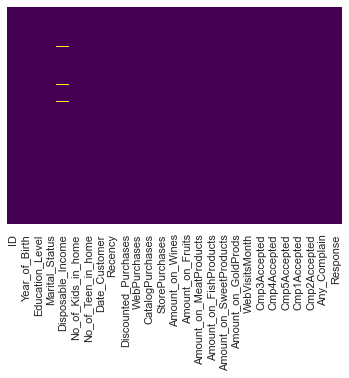

In [13]:
#Let's create a heatmap plot to visualize the amount of missing values.
# checking only train set - visualize
sns.heatmap(train.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

In [14]:
find_missing_data(dataset)

,Total,Percent
Response,672,0.300000
Disposable_Income,24,0.010714
StorePurchases,0,0.000000
Year_of_Birth,0,0.000000
Education_Level,0,0.000000
Marital_Status,0,0.000000
No_of_Kids_in_home,0,0.000000
No_of_Teen_in_home,0,0.000000
Date_Customer,0,0.000000
Recency,0,0.000000


<AxesSubplot:>

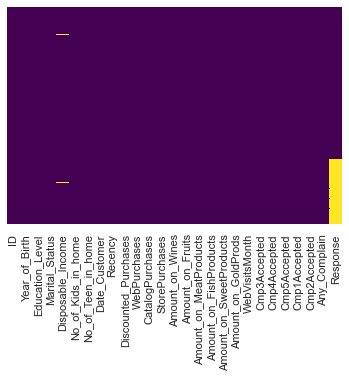

In [15]:
# checking only datasets set
sns.heatmap(dataset.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

In [20]:
# Outlier detection. There are many method to detect outlier. Tukey Method is used to accomplish it here.

# Outlier detection 
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
   
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

# detect outliers from some variables
Outliers_to_drop = detect_outliers(train,2,["Year_of_Birth","Disposable_Income","No_of_Kids_in_home","No_of_Teen_in_home",
                                           "Recency", "Discounted_Purchases", "WebPurchases", "CatalogPurchases",
                                            "StorePurchases", "Amount_on_Wines", "Amount_on_Fruits", 
                                            "Amount_on_MeatProducts", "Amount_on_FishProducts", "Amount_on_SweetProducts",
                                           "Amount_on_GoldProds", "WebVisitsMonth"])

In [21]:
# Show the outliers rows
train.loc[Outliers_to_drop]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
54,ID_MNOMSWCS,1900,PhD,Together,100238.4,0,0,26-09-2013,43,1,...,64,224,1,0,0,1,0,0,0,0
51,ID_J2LTL5ZA,1966,2n Cycle,Divorced,77011.2,0,1,03-08-2012,59,8,...,116,149,6,0,0,0,0,0,0,0
342,ID_4F85ZQDR,1974,PhD,Married,188691.6,0,1,01-03-2014,105,15,...,2,1,0,0,0,0,0,0,0,0
349,ID_EIP1OLBI,1957,Master,Together,61077.6,1,1,08-01-2013,95,13,...,114,135,5,0,0,0,0,0,0,0
546,ID_L73TY74R,1980,Graduation,Single,72568.8,0,1,01-04-2013,32,7,...,9,170,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,ID_9H5ARVGY,1953,Graduation,Divorced,99147.6,0,0,10-11-2013,65,1,...,153,173,1,0,0,0,0,0,0,0
1057,ID_L7W8WZAN,1976,PhD,Married,95008.8,0,0,11-01-2013,9,1,...,92,129,2,0,0,1,1,0,0,1
1256,ID_QWMCMJL7,1976,Graduation,Together,67096.8,0,1,29-04-2013,39,4,...,101,232,7,0,0,0,0,0,0,0
1330,ID_XD24X59L,1952,Graduation,Married,85328.4,0,1,17-02-2013,68,2,...,174,195,4,0,0,0,0,0,0,0


In [22]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [23]:
# after removing outlier, let's re-concat the data sets
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

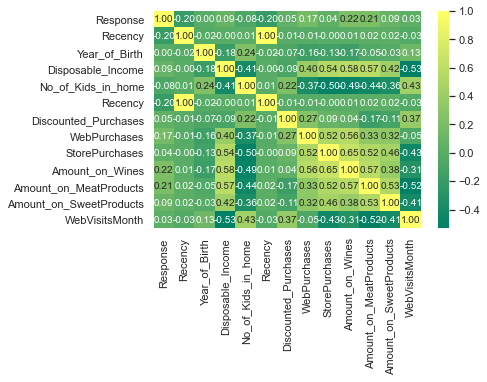

In [30]:
#Numerical analysis
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
corr_numeric = sns.heatmap(dataset[["Response", "Recency","Year_of_Birth","Disposable_Income","No_of_Kids_in_home","Recency", 
                                    "Discounted_Purchases", "WebPurchases", "StorePurchases", "Amount_on_Wines", 
                                    "Amount_on_MeatProducts", "Amount_on_SweetProducts","WebVisitsMonth"]]
                           .corr(),annot=True, fmt = ".2f", cmap = "summer")

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


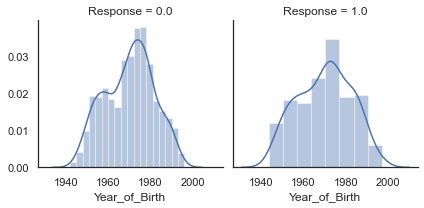

In [31]:
# Explore the Age vs Survived features
Year_of_Birth_Response = sns.FacetGrid(dataset, col='Response')
Year_of_Birth_Response = Year_of_Birth_Response.map(sns.distplot, "Year_of_Birth")

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


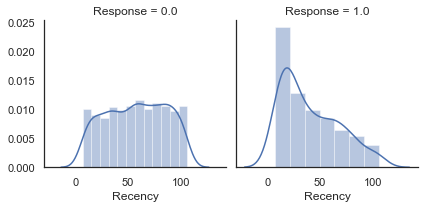

In [32]:
# Explore the Age vs Survived features
Recency_Response = sns.FacetGrid(dataset, col='Response')
Recency_Response = Recency_Response.map(sns.distplot, "Recency")

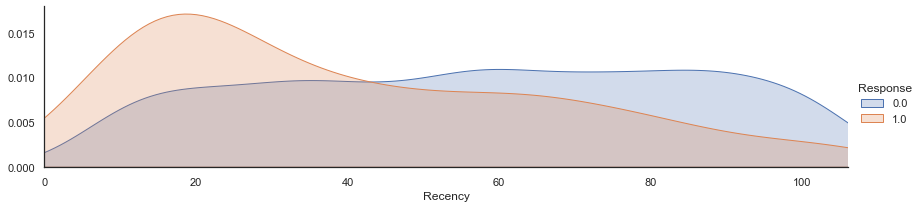

In [34]:
fig = sns.FacetGrid(dataset, hue = 'Response', aspect = 4)
fig.map(sns.kdeplot, 'Recency' , shade = True)
fig.set(xlim = (0, dataset['Recency'].max()))
fig.add_legend()